### Confirm Tensorflow Installation

In [146]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


### Importing the necessary modules

In [147]:
import numpy as np
import pandas as pd
import os
import glob
from os import listdir
from os.path import isfile, join
import cv2

### Loading and Preprocessing

In [148]:
data_path = r"D:\training"
fnames = glob.glob(data_path + r'\*.jpg')

print("found",len(fnames),"jpg files.")

found 2190 jpg files.


在讀進label_tab時就要分train, test比較方便  
方法：shuffle後，每個類別前6 train, 後4 test

In [149]:
label_tab = pd.read_csv(data_path + r'\label.csv')
label_tab = label_tab.sample(frac = 1)
label_tab = label_tab.sort_values(by = 'category').reset_index(drop=True)


In [150]:
train_tab = pd.DataFrame(columns = ['filename', 'category'])
valid_tab = pd.DataFrame(columns = ['filename', 'category'])

for i in np.arange(max(label_tab['category']) + 1):
    train_tab = pd.concat([train_tab, label_tab[label_tab['category'] == i].reset_index(drop=True).iloc[:6, :]])
    valid_tab = pd.concat([valid_tab, label_tab[label_tab['category'] == i].reset_index(drop=True).iloc[6:, :]])

train_tab = train_tab.reset_index(drop=True)
valid_tab = valid_tab.reset_index(drop=True)

print('train_tab :', train_tab.shape)
print('valid_tab :', valid_tab.shape)

train_tab : (1314, 2)
valid_tab : (876, 2)


In [204]:
#Load image
x_train = []
x_valid = []

for i in range(train_tab.shape[0]):
    file_ = data_path + '\\' + train_tab.at[i, 'filename']
    img = cv2.imread(file_,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (240, 240), interpolation=cv2.INTER_AREA) # 方形
    x_train.append(img)

for i in range(valid_tab.shape[0]):
    file_ = data_path + '\\' + valid_tab.at[i, 'filename']
    img = cv2.imread(file_,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (240, 240), interpolation=cv2.INTER_AREA) # 方形
    x_valid.append(img)

print(np.array(x_train).shape)
print(np.array(x_valid).shape)

(1314, 240, 240, 3)
(876, 240, 240, 3)


In [205]:
#Load label
y_train = []
y_valid = []

for i in range(train_tab.shape[0]):
    label_ = train_tab.at[i, 'category']
    y_train.append(label_)

for i in range(valid_tab.shape[0]):
    label_ = valid_tab.at[i, 'category']
    y_valid.append(label_)

print(np.array(y_train).shape)
print(np.array(y_valid).shape)

(1314,)
(876,)


In [206]:
# 轉 0/1
from tensorflow.keras.utils import to_categorical

# to array

x_train = np.array(x_train)
x_valid = np.array(x_valid)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# 轉 0/1
#Convert a category vector to a binary (0 or 1) matrix-type representation
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

print(np.array(y_train).shape)
print(np.array(y_valid).shape)

(1314, 219)
(876, 219)


In [207]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range = 45,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

datagen.fit(x_train)
datagen.fit(x_valid)

print(x_train.shape)
print(x_valid.shape)

(1314, 240, 240, 3)
(876, 240, 240, 3)


### Show the image

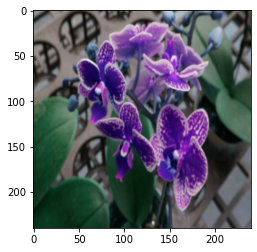

Answer: 37
Answer(one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [241]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0])
plt.imshow(x_train[idx])
plt.show()

print("Answer:", np.argmax(y_train[idx]))
print("Answer(one-hot):", y_train[idx])

### Build the network

You can show the detail for it:

In [251]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(240, 240, 3),
    pooling=None,
    classes=219
)

In [252]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 240, 240, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 120, 120, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 120, 120, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### Training the network

In [257]:
epoch = 10

model.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)

history = model.fit(datagen.flow(x_train, y_train, batch_size = 8), 
         validation_data = datagen.flow(x_valid, y_valid, batch_size = 4), 
         epochs = epoch)



Epoch 1/10
165/165 [==============================] - 175s 1s/step - loss: 3.6623 - accuracy: 0.1446 - val_loss: 3.9222 - val_accuracy: 0.1530
Epoch 2/10
165/165 [==============================] - 161s 975ms/step - loss: 3.5962 - accuracy: 0.1568 - val_loss: 3.9916 - val_accuracy: 0.1553
Epoch 3/10
165/165 [==============================] - 167s 1s/step - loss: 3.4700 - accuracy: 0.1697 - val_loss: 3.5566 - val_accuracy: 0.2021
Epoch 4/10
165/165 [==============================] - 164s 994ms/step - loss: 3.4431 - accuracy: 0.1766 - val_loss: 3.6022 - val_accuracy: 0.1952
Epoch 5/10
165/165 [==============================] - 159s 962ms/step - loss: 3.3841 - accuracy: 0.1918 - val_loss: 3.5092 - val_accuracy: 0.2089
Epoch 6/10
165/165 [==============================] - 165s 1s/step - loss: 3.3659 - accuracy: 0.1895 - val_loss: 3.5215 - val_accuracy: 0.2100
Epoch 7/10
165/165 [==============================] - 158s 959ms/step - loss: 3.3725 - accuracy: 0.1933 - val_loss: 3.5303 - val_accu

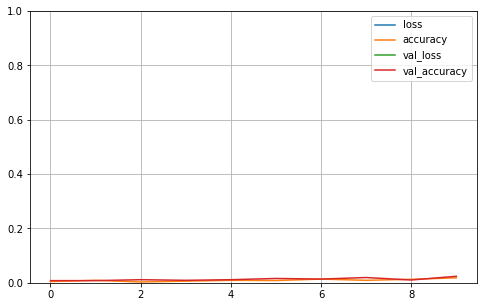

28/28 [==============================] - 2s 68ms/step - loss: 55.8812 - accuracy: 0.0160
Predict probabilities: [[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0

In [246]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(x_valid, y_valid)

x_new = x_valid[:3]
y_predict = model.predict(x_new)
print("Predict probabilities:", y_predict.round(2))
print("Predict answers:", y_predict.argmax(axis=1))